# **Data Mining Project**


* [1. Importing data](#import_data)
* [2. Exploring Data](#explore_1)
* [3. Preprocessing](#preprocessing)
* [4. Normalization](#normalization)
* [5. Feature engineering](#encoding)
* [6. Clustering](#clustering)


not too many variables
two different objects and 2 clustering analysis than combine into one result
value - value of customer in company
one for usage and one for value - 2 clusters
two for different purposes and than join together if want
PCA -> don't use it
objective of segmentation - useful to manage infinit possibilities
use of PCA - welcome to use it but be carfeul - more subjective

Fragen
-woher weiß ich welche variablen ich include (in class haben leute 9 included)
-

In [1431]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from ydata_profiling import ProfileReport
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


sns.set()

<hr>
<div style="background-color: #e6f7ff; padding: 15px; border-radius: 5px;">
<a class="anchor" id="import_data">

## **1. Importing data**

</a>
</div>

In [1432]:
df = pd.read_csv("/Users/helenamashayekhi/Documents/Master's/Data Mining/group_project/XYZ_sports_dataset.csv", sep=';')

<hr>
<div style="background-color: #e6f7ff; padding: 15px; border-radius: 5px;">
<a class="anchor" id="explore_1">

## **2. Exploring Data**

</a>
</div>

<hr>
<a class="anchor" id="fillemptycells">
    
## 2.1 General exploration
    
</a>

In [1433]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14942.0,NaN,NaN,NaN,17470.5,4313.528196,10000.0,13735.25,17470.5,21205.75,24941.0
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14447.0,NaN,NaN,NaN,2230.816086,1566.527734,0.0,1470.0,1990.0,2790.0,10890.0
EnrollmentStart,14942,1490,02.03.15,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnrollmentFinish,14942,1300,16.09.15,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodStart,14942,12,01.07.19,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodFinish,14942,11,31.12.19,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateLastVisit,14942,1384,31.10.19,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0


In [1434]:
df["UseByTime"].value_counts().sort_index()

0    14238
1      704
Name: UseByTime, dtype: int64

In [1435]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,03.09.19,31.10.19,01.07.19,31.12.19,30.10.19,1,...,0.0,9.0,7,NaN,Jun 28,2,0,0.0,0,0
1,10001,29,Female,2630.0,12.08.14,14.09.15,01.01.15,31.12.15,16.07.15,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,02.05.17,01.06.17,01.01.17,30.06.17,25.05.17,7,...,0.0,6.0,0,7.0,30. Mar,6,0,0.0,0,1
3,10003,9,Male,0.0,05.09.18,12.02.19,01.07.18,30.06.19,21.01.19,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,20.04.16,07.06.18,01.01.18,30.06.18,09.11.17,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [1436]:
df["HasReferences"].value_counts()

0.0    14633
1.0      297
Name: HasReferences, dtype: int64

In [1437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  object 
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [1438]:
df.isnull().sum().head(50)

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [1439]:
df.isnull().sum().tail(50)

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [1440]:
df.duplicated().value_counts()

False    14942
dtype: int64

In [1441]:
df.shape

(14942, 31)

In [1442]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

<hr>
<a class="anchor" id="fillemptycells">
    
## 2.2 Distribution
    
</a>

In [1443]:
df["Age"].value_counts().sort_index()

0       19
1      152
2      213
3      189
4      174
5      180
6      163
7      170
8      145
9      148
10     115
11     126
12     115
13     118
14     134
15     169
16     194
17     162
18     230
19     899
20     987
21    1166
22    1187
23     954
24     750
25     583
26     443
27     359
28     245
29     297
30     253
31     214
32     218
33     188
34     198
35     191
36     173
37     159
38     171
39     138
40     157
41     131
42     142
43     124
44     102
45     108
46     103
47      83
48      75
49      84
50      63
51      72
52      72
53      56
54      61
55      69
56      56
57      47
58      38
59      63
60      44
61      39
62      42
63      37
64      40
65      37
66      40
67      31
68      37
69      27
70      18
71      13
72      23
73      21
74      23
75      12
76       9
77       8
78       6
79       4
80      12
81       5
82       5
83       7
84       2
85       3
86       1
87       1
Name: Age, dtype: int64

In [1444]:
df["Gender"].value_counts()

Female    8931
Male      6011
Name: Gender, dtype: int64

In [1445]:
df["Income"].value_counts().sort_index()

0.0        2123
290.0         1
370.0         1
390.0         2
410.0         1
           ... 
9630.0        1
9720.0        1
9840.0        1
10260.0       1
10890.0       1
Name: Income, Length: 737, dtype: int64

In [1446]:
df["DaysWithoutFrequency"].value_counts().sort_index()

0       604
1       563
2       380
3       349
4        99
       ... 
1670      1
1681      1
1710      1
1717      1
1745      1
Name: DaysWithoutFrequency, Length: 660, dtype: int64

In [1447]:
df["LifetimeValue"].value_counts().sort_index()

0.0        3
01. Mar    1
03. Jun    2
05. Apr    4
10. Jun    1
          ..
997.2      1
997.55     1
997.7      1
998.4      1
998.9      1
Name: LifetimeValue, Length: 5668, dtype: int64

In [1448]:
df["UseByTime"].value_counts().sort_index()

0    14238
1      704
Name: UseByTime, dtype: int64

In [1449]:
df["AthleticsActivities"].value_counts().sort_index()

0.0    14796
1.0      110
Name: AthleticsActivities, dtype: int64

In [1450]:
df["NumberOfFrequencies"].value_counts().sort_index()

1.0       609
2.0       661
3.0       623
4.0       583
5.0       556
6.0       521
7.0       462
8.0       439
9.0       417
10.0      383
11.0      355
12.0      343
13.0      289
14.0      291
15.0      252
16.0      276
17.0      295
18.0      249
19.0      220
20.0      232
21.0      213
22.0      175
23.0      164
24.0      176
25.0      177
26.0      140
27.0      167
28.0      139
29.0      130
30.0      143
31.0      133
32.0      121
33.0      134
34.0      124
35.0      107
36.0       83
37.0      128
38.0       99
39.0       87
40.0       78
41.0       97
42.0       85
43.0       92
44.0       65
45.0       76
46.0       96
47.0       76
48.0       81
49.0       67
50.0       66
51.0       70
52.0       57
53.0       58
54.0       60
55.0       61
56.0       56
57.0       39
58.0       50
59.0       55
60.0       49
61.0       45
62.0       52
63.0       44
64.0       41
65.0       38
66.0       43
67.0       40
68.0       38
69.0       41
70.0       36
71.0       42
72.0  

In [1451]:
df["AttendedClasses"].value_counts().sort_index()

0      10432
1        411
2        214
3        195
4        171
5        144
6        150
7        139
8         96
9        113
10       112
11       102
12        84
13        95
14        65
15        69
16        87
17        66
18        62
19        66
20        66
21        55
22        59
23        47
24        57
25        43
26        54
27        38
28        33
29        28
30        45
31        43
32        32
33        30
34        26
35        36
36        31
37        35
38        27
39        32
40        19
41        25
42        26
43        35
44        14
45        18
46        25
47        22
48        36
49        30
50        21
51        24
52        20
53        14
54        26
55        18
56        25
57        22
58        10
59        17
60        14
61        18
62        15
63        18
64        14
65        12
66        18
67        14
68        12
69        19
70        13
71        10
72        19
73        10
74        15
75         9
76         9

In [1452]:
df["AttendedClasses"].value_counts().sort_index()

0      10432
1        411
2        214
3        195
4        171
5        144
6        150
7        139
8         96
9        113
10       112
11       102
12        84
13        95
14        65
15        69
16        87
17        66
18        62
19        66
20        66
21        55
22        59
23        47
24        57
25        43
26        54
27        38
28        33
29        28
30        45
31        43
32        32
33        30
34        26
35        36
36        31
37        35
38        27
39        32
40        19
41        25
42        26
43        35
44        14
45        18
46        25
47        22
48        36
49        30
50        21
51        24
52        20
53        14
54        26
55        18
56        25
57        22
58        10
59        17
60        14
61        18
62        15
63        18
64        14
65        12
66        18
67        14
68        12
69        19
70        13
71        10
72        19
73        10
74        15
75         9
76         9

In [1453]:
df["AllowedWeeklyVisitsBySLA"].value_counts().sort_index()

1.0      525
2.0     2341
3.0      160
4.0      742
5.0       16
6.0      118
7.0    10505
Name: AllowedWeeklyVisitsBySLA, dtype: int64

In [1454]:
df["AllowedNumberOfVisitsBySLA"].value_counts().sort_index()

0.56          2
0.71          4
0.86          1
02. Mar       2
03. Jan       1
06. Feb       4
09. Mar       1
10. Jan       6
103.71        1
104.13        2
12.0         15
13. Feb       5
13.14         1
13.16         4
13.42        11
13.72         6
137.16        4
14.0         20
14.28        12
14.58         7
14.86        44
14.98        15
144.97        1
15.14        13
15.42        14
15.44         3
15.72         6
15.87         1
156.03        1
16. Mar      18
16.0         16
16.26         1
16.28        16
16.56         3
16.58         5
16.71         1
16.86       142
17. Jan      34
17.14       153
17.15         1
17.16        25
17.42      1497
17.72       163
17.99         4
178.01        2
18.28         2
18.84         3
18.97         8
19.14         1
19.29         1
19.42        10
19.44         2
2.0           1
20. Feb      21
20.0          3
20.13         2
20.56         2
20.58         3
206.01        1
21.0         30
21.14         1
21.16         1
21.42   

In [1455]:
df["RealNumberOfVisits"].value_counts().sort_index()

0     2698
1     1641
2     1635
3     1440
4     1323
5     1045
6      913
7      711
8      611
9      466
10     376
11     348
12     263
13     210
14     163
15     142
16     138
17     114
18      87
19      73
20      65
21      49
22      48
23      39
24      44
25      42
26      31
27      24
28      20
29      21
30      18
31      13
32      13
33      14
34      20
35       9
36       8
37       6
38       5
39       7
40       6
41       5
42       4
43       2
44       1
45       5
46       4
47       3
48       1
49       3
50       1
51       2
52       1
53       1
56       1
57       1
58       1
66       2
72       3
84       2
Name: RealNumberOfVisits, dtype: int64

<hr>
<a class="anchor" id="fillemptycells">
    
## 2.3 Elimination of Variables?
    
</a>

In [1456]:
#df=df[df.columns[df.isnull().sum() < 7471]] # eliminate columns with 50% or more of missing values

In [1457]:
#df = df.drop(['DanceActivities', 'NatureActivities'], axis=1)

In [1458]:
#dropped = df[['OtherActivities', 'NumberOfReferences', 'AthleticsActivities']]
#df = df.drop(['OtherActivities', 'NumberOfReferences', 'AthleticsActivities'], axis=1)

In [1459]:
df = df.drop(['ID'], axis=1)

<hr>
<div style="background-color: #e6f7ff; padding: 15px; border-radius: 5px;">
<a class="anchor" id="preprocessing">

## **3. Data Pre-processing**

</a>
</div>

<hr>
<a class="anchor" id="fillemptycells">
    
## 3.1 Fill empty cells
    
</a>

In [1460]:
df.replace(" ", np.nan, inplace=True)

<a class="anchor" id="metricandnonmetric">

## 3.2. METRIC and NON METRIC FEATURES

</a>

In [1461]:
df["AllowedNumberOfVisitsBySLA"]

0         Jun 28
1          17.42
2        30. Mar
3          17.72
4          60.97
          ...   
14937      34.84
14938      60.97
14939    30. Mar
14940      15.87
14941      60.97
Name: AllowedNumberOfVisitsBySLA, Length: 14942, dtype: object

In [1462]:
months = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}

for column in df.columns:
    for month_num, month_abbr in months.items():
        df[column] = df[column].replace(to_replace=month_abbr, value=month_num, regex=True)

df["AllowedNumberOfVisitsBySLA"] = df["AllowedNumberOfVisitsBySLA"].apply(lambda x: re.sub(r'(\d)\s+(\d)', r'\1.\2', str(x)))
df["AllowedNumberOfVisitsBySLA"] = df["AllowedNumberOfVisitsBySLA"].apply(lambda x: re.sub(r' ', r'', str(x)))
print(df["AllowedNumberOfVisitsBySLA"])

0        06.28
1        17.42
2        30.03
3        17.72
4        60.97
         ...  
14937    34.84
14938    60.97
14939    30.03
14940    15.87
14941    60.97
Name: AllowedNumberOfVisitsBySLA, Length: 14942, dtype: object


In [1463]:
df['AllowedNumberOfVisitsBySLA'].head(50)

0     06.28
1     17.42
2     30.03
3     17.72
4     60.97
5     59.01
6     30.03
7     60.97
8     60.97
9     17.72
10    60.97
11    60.97
12    60.97
13    17.42
14    59.01
15    28.98
16     42.0
17    62.02
18    34.02
19    24.01
20    60.97
21    60.97
22    68.58
23    26.13
24    60.97
25    06.28
26    17.42
27    60.97
28    30.03
29    60.97
30    30.03
31    15.14
32    28.98
33    17.42
34    30.03
35    60.97
36    17.14
37    60.97
38    26.13
39    28.98
40    60.97
41    32.97
42    59.01
43    28.98
44    60.97
45    17.42
46    60.97
47    17.42
48    17.42
49    60.97
Name: AllowedNumberOfVisitsBySLA, dtype: object

In [1464]:
df["LifetimeValue"] = df["LifetimeValue"].apply(lambda x: re.sub(r'(\d)\s+(\d)', r'\1.\2', str(x)))
df["LifetimeValue"] = df["LifetimeValue"].apply(lambda x: re.sub(r' ', r'', str(x)))
df["LifetimeValue"].value_counts().sort_index()

0.0       3
01.03     1
03.06     2
05.04     4
10.06     1
         ..
997.2     1
997.55    1
997.7     1
998.4     1
998.9     1
Name: LifetimeValue, Length: 5668, dtype: int64

In [1465]:
df.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                  object
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA     object
RealNumberOfVisits              int64
NumberOfRene

In [1466]:
non_metric_features = ["Gender", "EnrollmentStart", "EnrollmentFinish", "LastPeriodStart", "LastPeriodFinish", "DateLastVisit"]
binary_features = ["Gender", "UseByTime", "AthleticsActivities", "WaterActivities", "WinterActivities", "FitnessActivities", "DanceActivities", "TeamActivities", "RacketActivities", "CombatActivities", "NatureActivities", "SpecialActivities", "OtherActivities", "HasReferences", "NumberOfReferences", "Dropout"]
metric_features = df.columns.drop(non_metric_features).to_list()

<a class="anchor" id="fillmissingvalues">

## 3.3. Filling Missing Values 

</a>


In [1467]:
df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

In [1468]:
df[metric_features].median()

Age                             23.00
Income                        1990.00
DaysWithoutFrequency            41.00
LifetimeValue                  166.20
UseByTime                        0.00
AthleticsActivities              0.00
WaterActivities                  0.00
FitnessActivities                1.00
DanceActivities                  0.00
TeamActivities                   0.00
RacketActivities                 0.00
CombatActivities                 0.00
NatureActivities                 0.00
SpecialActivities                0.00
OtherActivities                  0.00
NumberOfFrequencies             18.00
AttendedClasses                  0.00
AllowedWeeklyVisitsBySLA         7.00
AllowedNumberOfVisitsBySLA      38.99
RealNumberOfVisits               4.00
NumberOfRenewals                 1.00
HasReferences                    0.00
NumberOfReferences               0.00
Dropout                          1.00
dtype: float64

In [1469]:
modes = df[non_metric_features].mode().loc[0]
modes

Gender                Female
EnrollmentStart     02.03.15
EnrollmentFinish    16.09.15
LastPeriodStart     01.07.19
LastPeriodFinish    31.12.19
DateLastVisit       31.10.19
Name: 0, dtype: object

In [1470]:
df.fillna(df[metric_features].median(), inplace=True)
df.fillna(modes, inplace=True)
df.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

In [1471]:
df_neighbors = df.copy()

In [1472]:
nans_index = df_neighbors.isna().any(axis=1)
df_neighbors[nans_index]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [1473]:
df[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,60,5500.0,1,89.35,0,0.0,0.0,1.0,0.0,0.0,...,0.0,9.0,7,7.0,06.28,2,0,0.0,0,0
1,29,2630.0,60,479.2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,23,1980.0,7,37.6,0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,9,0.0,22,155.4,0,0.0,0.0,0.0,0.0,1.0,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,35,4320.0,210,373.2,0,0.0,0.0,1.0,0.0,0.0,...,0.0,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,14,0.0,2,1460.45,0,0.0,1.0,0.0,0.0,0.0,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
14938,39,1990.0,38,343.85,0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
14939,20,1810.0,2,43.6,0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1
14940,55,4800.0,3,788.6,0,0.0,1.0,0.0,0.0,0.0,...,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0


In [1474]:
# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_neighbors[metric_features] = imputer.fit_transform(df_neighbors[metric_features])

In [1475]:
# See rows with NaNs imputed
df_neighbors.loc[nans_index, metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


<a class="anchor" id="fillmissingvalues">

## 3.4. Outliers

</a>


TypeError: Horizontal orientation requires numeric `x` variable.

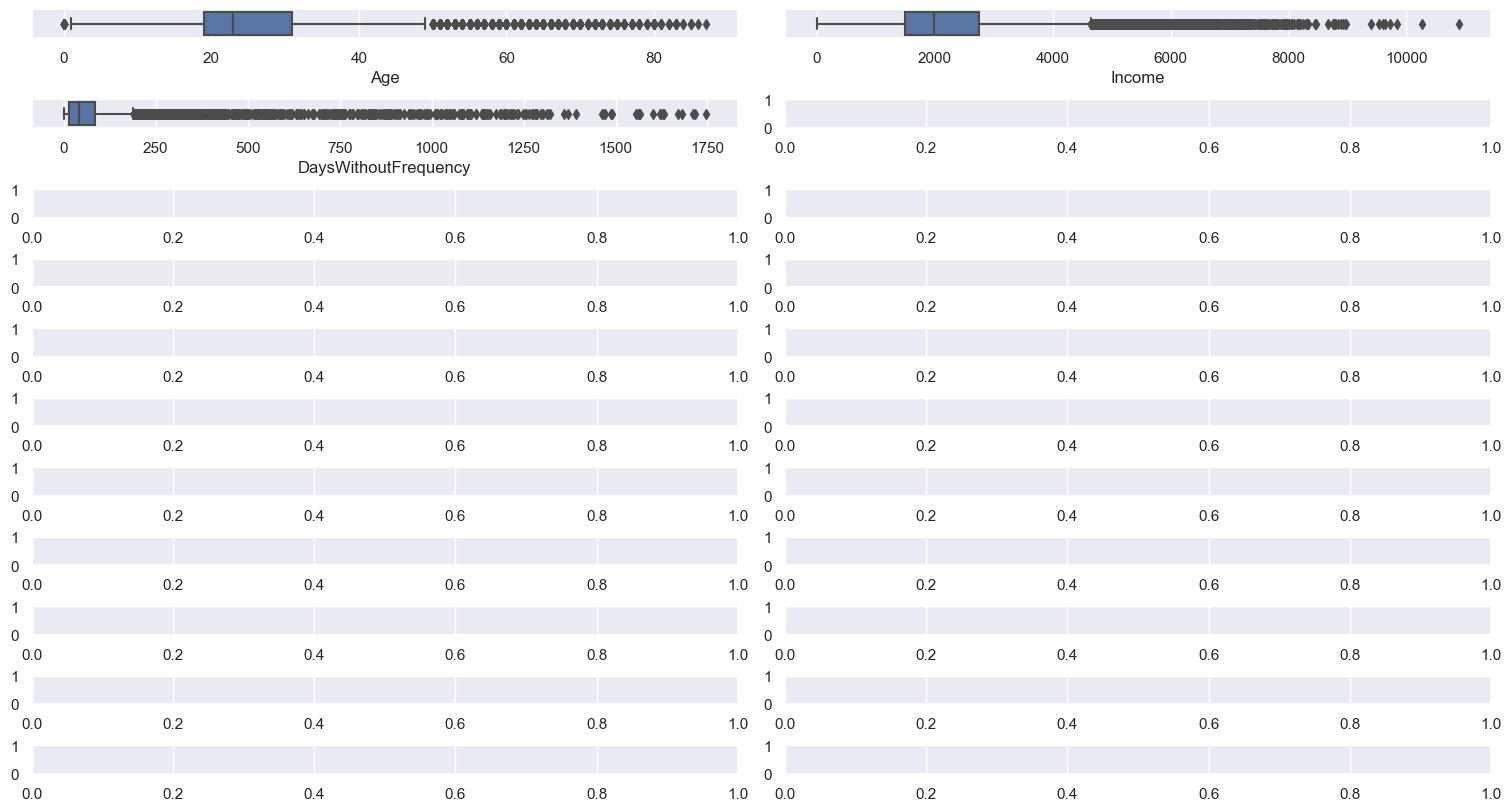

In [1476]:
ramnt=df.loc[:,metric_features]
names = list(ramnt.columns)
f, axes = plt.subplots(11, 2, figsize=(15,8), constrained_layout=True)  
y = 0;
for name in names:
    i, j = divmod(y, 2)
    sns.boxplot(x=df[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()

In [1477]:
#is this right??
values_to_remove = df.loc[(df["Age"] < 5) & (df["WaterActivities"] != 0), "Age"]


# Remove rows with specific values
df = df[~df['Age'].isin(values_to_remove)]
df["Age"].value_counts().sort_index()

5      180
6      163
7      170
8      145
9      148
10     115
11     126
12     115
13     118
14     134
15     169
16     194
17     162
18     230
19     899
20     987
21    1166
22    1187
23     954
24     750
25     583
26     443
27     359
28     245
29     297
30     253
31     214
32     218
33     188
34     198
35     191
36     173
37     159
38     171
39     138
40     157
41     131
42     142
43     124
44     102
45     108
46     103
47      83
48      75
49      84
50      63
51      72
52      72
53      56
54      61
55      69
56      56
57      47
58      38
59      63
60      44
61      39
62      42
63      37
64      40
65      37
66      40
67      31
68      37
69      27
70      18
71      13
72      23
73      21
74      23
75      12
76       9
77       8
78       6
79       4
80      12
81       5
82       5
83       7
84       2
85       3
86       1
87       1
Name: Age, dtype: int64

In [1478]:
#q25 = df[metric_features].quantile(.25)
#q75 = df[metric_features].quantile(.75)
#iqr = (q75 - q25)

#upper_lim = q75 + 1.5 * iqr
#lower_lim = q25 - 1.5 * iqr

#filters2 = []
#for metric in metric_features:
#    llim = lower_lim[metric]
#    ulim = upper_lim[metric]
#    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

#filters2 = pd.Series(np.all(filters2, 0))
#sports_data_2 = df[filters2]
#print('Percentage of data kept after removing outliers:', np.round(sports_data_2.shape[0] / df.shape[0], 4))

___combining outlier methods___

In [1479]:
#sports_data_3 = sports_data[(filters1 | filters2)]
#print('Percentage of data kept after removing outliers:', np.round(sports_data_3.shape[0] / sports_data_original.shape[0], 4))

<a class="anchor" id="fillmissingvalues">

## 4. Feature Enginering

</a>


In [1480]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df["Gender"] = number.fit_transform(df['Gender'].astype(str))

df["Gender"].value_counts()

0    8490
1    5705
Name: Gender, dtype: int64

In [1481]:
df.loc[df["EnrollmentStart"] == df["EnrollmentFinish"], "EnrollmentFinish"] = df["LastPeriodFinish"]

In [1500]:
df["EnrollmentFinish"].head(50)

0     31.10.19
1     14.09.15
2     01.06.17
3     12.02.19
4     07.06.18
5     31.07.16
6     11.04.19
7     31.07.19
8     07.06.17
9     01.02.17
10    04.01.16
11    31.07.19
12    16.09.15
13    31.07.18
14    07.04.18
15    16.09.15
16    31.10.19
17    10.09.19
18    31.10.19
19    31.10.19
20    31.07.16
21    31.07.18
22    16.09.15
23    31.10.19
24    08.07.16
25    31.12.19
26    31.07.16
27    08.07.18
28    29.08.17
29    09.07.19
30    03.05.17
32    16.09.15
34    31.10.19
35    05.12.15
36    31.12.19
37    08.07.16
38    31.12.19
39    01.02.19
40    31.07.16
41    09.07.19
42    11.04.19
43    16.09.15
44    31.07.18
45    31.07.18
46    08.07.18
47    11.05.19
48    31.07.16
49    31.12.19
50    31.05.18
51    31.12.19
Name: EnrollmentFinish, dtype: object

In [1482]:
#df['AgeClass'] = pd.cut(df['Age'], bins=[-1, 5, 20, 35, 49, 65, np.inf], labels=['<5','5-20', '20-35', '35-49', '49-65', '65+'])
#df['AgeClass'].value_counts(dropna=False)

In [1483]:
df['EnrollmentDuration'] = (pd.to_datetime(df['EnrollmentFinish']) - pd.to_datetime(df['EnrollmentStart'])).dt.days
df['MembershipDuration'] = pd.cut(df['EnrollmentDuration'], bins=[-1, 30, 90, 180, 365, np.inf], labels=['<1m', '1-3m', '3-6m', '6-12m', '12m+'])
df['MembershipDuration'].value_counts()

12m+     6130
6-12m    3938
3-6m     1799
1-3m     1077
<1m       425
Name: MembershipDuration, dtype: int64

In [1484]:
df["DaysWithoutFrequencyClass"] = pd.cut(df['DaysWithoutFrequency'], bins=[-1, 8, 16, 31, 61, np.inf], labels=['<8', '8-15', '16-30', '31-60', '>60'])
df['DaysWithoutFrequencyClass'].value_counts()

>60      4641
31-60    3999
<8       2664
16-30    1594
8-15     1297
Name: DaysWithoutFrequencyClass, dtype: int64

In [1485]:
#whats wrong??
df["AverageFrequency"] = df["NumberOfFrequencies"] / (df['EnrollmentDuration'] / 7) 
df['AverageFrequency'].describe()

count    14195.000000
mean         0.702735
std          5.748503
min       -406.000000
25%          0.169794
50%          0.426901
75%          0.857758
max        126.000000
Name: AverageFrequency, dtype: float64

In [1486]:
df["AverageFrequencyClass"] = pd.cut(df['AverageFrequency'], bins=[-1, 0.5, 1, 2, 3, np.inf], labels=['<0.5', '0.5-1', '1-2', '2-3', '>3'])
df['AverageFrequencyClass'].value_counts()

<0.5     7506
0.5-1    3434
1-2      1960
2-3       478
>3        439
Name: AverageFrequencyClass, dtype: int64

In [1487]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,14195.0,27.255160,13.422445,5.0,20.000000,23.000000,32.000000,87.0
Gender,14195.0,0.401902,0.490300,0.0,0.000000,0.000000,1.000000,1.0
Income,14195.0,2322.536104,1507.132979,0.0,1560.000000,2010.000000,2820.000000,10890.0
DaysWithoutFrequency,14195.0,82.872420,146.571658,0.0,14.000000,41.000000,85.000000,1745.0
UseByTime,14195.0,0.049595,0.217114,0.0,0.000000,0.000000,0.000000,1.0
AthleticsActivities,14195.0,0.007749,0.087691,0.0,0.000000,0.000000,0.000000,1.0
WaterActivities,14195.0,0.259105,0.438159,0.0,0.000000,0.000000,1.000000,1.0
FitnessActivities,14195.0,0.607186,0.488393,0.0,0.000000,1.000000,1.000000,1.0
DanceActivities,14195.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
TeamActivities,14195.0,0.058260,0.234243,0.0,0.000000,0.000000,0.000000,1.0


In [1488]:
#not possible cause droped variables
df["NumberOfActivities"] = df["AthleticsActivities"] + df["WaterActivities"] + df["FitnessActivities"] + df["DanceActivities"]+ df["TeamActivities"] + df["RacketActivities"] + df["CombatActivities"] + df["NatureActivities"]+ df["SpecialActivities"] + df["OtherActivities"]
df["NumberOfActivities"].value_counts()

1.0    12868
2.0     1198
3.0      100
0.0       18
4.0        9
5.0        2
Name: NumberOfActivities, dtype: int64

In [1489]:
df["Dropout"].value_counts()

1    11557
0     2638
Name: Dropout, dtype: int64

In [1490]:
#relationship between the actual number of visits and the number of visits the user could have made 
df["Ratio"] = (df["NumberOfFrequencies"] / (df["AllowedWeeklyVisitsBySLA"]* (df["EnrollmentDuration"]/7))) *100
df["Ratio"]

0         3.813559
1        28.750000
2       -20.000000
3        12.237762
4         5.080545
           ...    
14937    15.819209
14938    28.217822
14939     6.896552
14940    59.376433
14941    12.054208
Name: Ratio, Length: 14195, dtype: float64

In [1491]:
#change dropout cause not consistent with enrollment finish
#check frequency
#allowed weekly visits - what means no value .- look at allowed visits
#is age incorrect cause of the enrollment finish column? since it was wrong for some
#DaysWithoutFrequencyClass2 - Contains the class obtained for the values of attribute DaysWithoutFrequency according to the following ranges:
#“[00,07]” for between 0 and 7 days (1 week) without attending;
#“]07,15]” for 8 to 15 days (2 weeks) without attending;
#“]15,30]” for between 16 and 30 days (approx. between 16 days and 1 month) without attending;
#“]30,60]” for between 31 and 60 days (approx. between 1 and 2 months) without attending;
#“]60,inf]” for more than 60 days without attending;
#LifetimeValueClass1 - Contains the class obtained for the values of attribute LifetimeValue according to the following ranges:
#ratio!! -> 43 = (42 / 41) * 100 the use that the client gave to the gym and could have given to the gym!
 #look on Wiki
 #has references does not match Number of references
 #has references change to true or false?

In [1492]:
c = df.corr(method="spearman").abs()
s = c.unstack()
so = round(s.sort_values(kind="quicksort"),4)
high_pairs = so[so > 0.50]
high_pairs = high_pairs[high_pairs < 1.0]

/var/folders/8f/lkffd0t922vg2dwwqj3ryvr80000gn/T/ipykernel_916/565915734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr(method="spearman").abs()


In [1493]:
pd.set_option('display.max_rows', 562)
high_pairs

DaysWithoutFrequency      RealNumberOfVisits          0.5368
RealNumberOfVisits        DaysWithoutFrequency        0.5368
NumberOfRenewals          NumberOfFrequencies         0.5389
NumberOfFrequencies       NumberOfRenewals            0.5389
FitnessActivities         AllowedWeeklyVisitsBySLA    0.5422
AllowedWeeklyVisitsBySLA  FitnessActivities           0.5422
WaterActivities           FitnessActivities           0.5805
FitnessActivities         WaterActivities             0.5805
NumberOfFrequencies       EnrollmentDuration          0.5992
EnrollmentDuration        NumberOfFrequencies         0.5992
Ratio                     NumberOfFrequencies         0.6231
NumberOfFrequencies       Ratio                       0.6231
                          AverageFrequency            0.6363
AverageFrequency          NumberOfFrequencies         0.6363
EnrollmentDuration        NumberOfRenewals            0.7498
NumberOfRenewals          EnrollmentDuration          0.7498
Income                  

In [1494]:
so_low = round(s.sort_values(kind="quicksort"),4)
low_pairs = so_low[so_low < 0.05]

In [1495]:
pd.set_option('display.max_rows', 562)
low_pairs

NumberOfActivities        AllowedWeeklyVisitsBySLA    0.0011
AllowedWeeklyVisitsBySLA  NumberOfActivities          0.0011
Gender                    HasReferences               0.0012
HasReferences             Gender                      0.0012
WaterActivities           Gender                      0.0012
Gender                    WaterActivities             0.0012
                          NumberOfReferences          0.0022
NumberOfReferences        Gender                      0.0022
Age                       DaysWithoutFrequency        0.0035
DaysWithoutFrequency      Age                         0.0035
OtherActivities           AthleticsActivities         0.0039
AthleticsActivities       OtherActivities             0.0039
Age                       Ratio                       0.0043
Ratio                     Age                         0.0043
TeamActivities            AthleticsActivities         0.0048
AthleticsActivities       TeamActivities              0.0048
                        

<a class="anchor" id="fillmissingvalues">

## 4.1. Exploring New Features

</a>

In [1498]:
#whats wrong??? It can't have negative values!! somethings wong with the enrollment duration!!
df["EnrollmentDuration"].value_counts().sort_index()

-332     1
-302     2
-301     1
-286     1
-282     1
        ..
 2152    1
 2154    2
 2181    1
 2183    8
 2184    1
Name: EnrollmentDuration, Length: 1900, dtype: int64

<hr>
<a class="anchor" id="selection">
    
# 5. Variable Selection
    
</a>

/var/folders/8f/lkffd0t922vg2dwwqj3ryvr80000gn/T/ipykernel_916/2067705221.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.round(df.loc[:,metric_features].corr(method="pearson"), decimals=2)


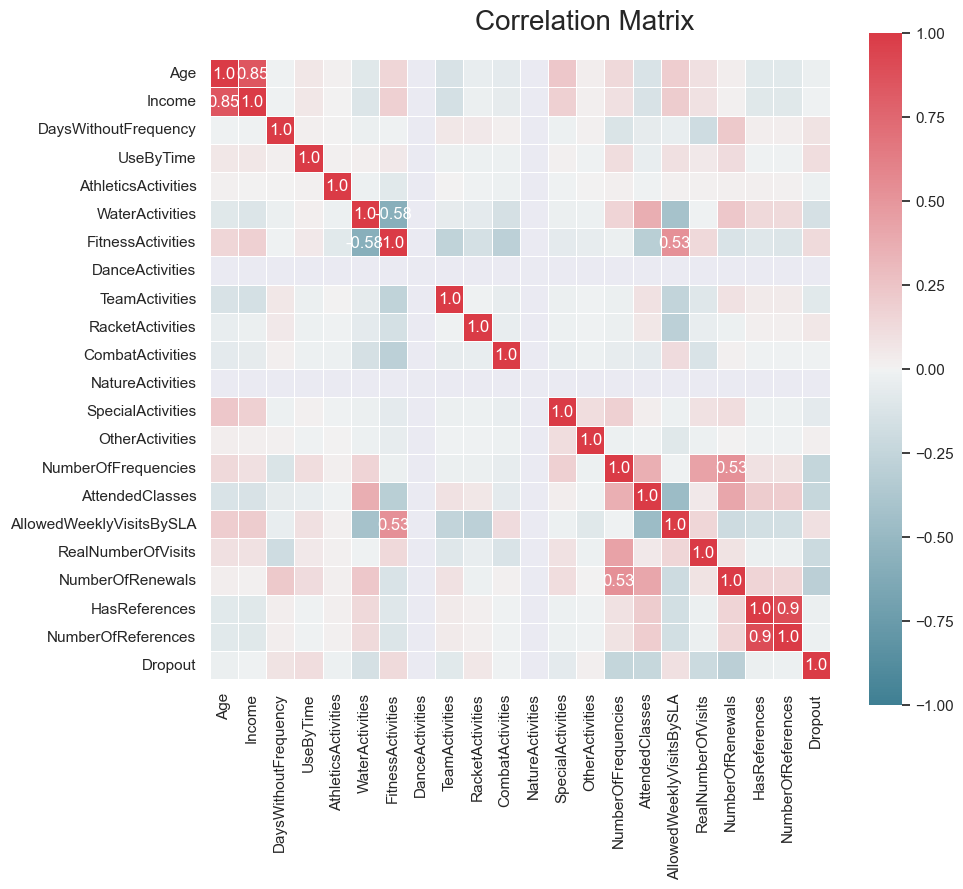

In [1496]:
fig = plt.figure(figsize=(10, 8))

corr = np.round(df.loc[:,metric_features].corr(method="pearson"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [1497]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Train a RandomForest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Access Feature Importances
importances = rf_model.feature_importances_

# Create a list of (feature, importance) pairs and sort it by importance
feature_importance_pairs = list(zip(X_train.columns, importances))
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Extract sorted feature names
sorted_features = [feature for feature, importance in sorted_feature_importance]

# Print the sorted features
print("Features Sorted by Importance:")
print(sorted_features)

NameError: name 'X_train' is not defined

<hr>
<a class="anchor" id="selection">
    
# 6. Data Normalization
    
</a>

In [ ]:
df_standard = df.copy()

In [ ]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_standard[metric_features])
scaled_feat

array([[ 2.43964445,  2.10835797, -0.55860256, ..., -0.13632667,
        -0.12618706, -2.09307679],
       [ 0.12999876,  0.204013  , -0.1560549 , ..., -0.13632667,
        -0.12618706,  0.47776556],
       [-0.31702944, -0.22728464, -0.51766551, ..., -0.13632667,
        -0.12618706,  0.47776556],
       ...,
       [-0.54054354, -0.34008556, -0.55177972, ..., -0.13632667,
        -0.12618706,  0.47776556],
       [ 2.06712095,  1.64388359, -0.54495688, ..., -0.13632667,
        -0.12618706, -2.09307679],
       [ 0.35351286,  0.91399527, -0.46990562, ..., -0.13632667,
        -0.12618706,  0.47776556]])

In [ ]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [2.72551603e+01 2.32253610e+03 8.28724199e+01 2.93153857e+02
 4.95949278e-02 7.74920747e-03 2.59105319e-01 6.07185629e-01
 0.00000000e+00 5.82599507e-02 2.45861219e-02 1.12997534e-01
 0.00000000e+00 2.78266995e-02 1.97252554e-03 4.08352237e+01
 9.50806622e+00 5.99006692e+00 4.30008827e+01 5.43275801e+00
 1.19450511e+00 1.82458612e-02 2.04297288e-02 8.14159915e-01] 
 [1.80149335e+02 2.27128980e+06 2.14817374e+04 1.29337062e+05
 4.71352709e-02 7.68915725e-03 1.91969753e-01 2.38511241e-01
 0.00000000e+00 5.48657288e-02 2.39816445e-02 1.00229092e-01
 0.00000000e+00 2.70523743e-02 1.96863468e-03 4.45300511e+03
 8.50861559e+02 3.82991190e+00 4.28537847e+02 4.15862323e+01
 1.93208675e+00 1.79129498e-02 2.62117209e-02 1.51303548e-01]


In [ ]:
df_standard[metric_features] = scaled_feat
df_standard.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentDuration,MembershipDuration,DaysWithoutFrequencyClass,AverageFrequency,AverageFrequencyClass,NumberOfActivities
0,2.439644,0,2.108358,03.09.19,31.10.19,01.07.19,31.12.19,30.10.19,-0.558603,-0.566697,...,-0.859359,-0.136327,-0.126187,-2.093077,236,6-12m,<8,0.266949,<0.5,1.0
1,0.129999,0,0.204013,12.08.14,14.09.15,01.01.15,31.12.15,16.07.15,-0.156055,0.517320,...,0.579495,-0.136327,-0.126187,0.477766,280,6-12m,31-60,0.575000,0.5-1,1.0
2,-0.317029,1,-0.227285,02.05.17,01.06.17,01.01.17,30.06.17,25.05.17,-0.517666,-0.710593,...,-0.859359,-0.136327,-0.126187,0.477766,-30,NaN,<8,-1.400000,NaN,1.0
3,-1.360095,1,-1.541084,05.09.18,12.02.19,01.07.18,30.06.19,21.01.19,-0.415323,-0.383038,...,-0.859359,-0.136327,-0.126187,0.477766,572,12m+,16-30,0.244755,<0.5,1.0
4,0.577027,1,1.325387,20.04.16,07.06.18,01.01.18,30.06.18,09.11.17,0.867371,0.222576,...,1.298922,-0.136327,-0.126187,0.477766,807,12m+,>60,0.355638,<0.5,1.0


In [ ]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.0,14195.00,...,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00,14195.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.0,0.00,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-1.54,-0.57,-0.82,-0.23,-0.09,-0.59,-1.24,0.0,-0.25,...,-0.04,-0.60,-0.33,-2.55,-2.05,-0.84,-0.86,-0.14,-0.13,-2.09
25%,-0.54,-0.51,-0.47,-0.58,-0.23,-0.09,-0.59,-1.24,0.0,-0.25,...,-0.04,-0.51,-0.33,0.52,-0.68,-0.69,-0.86,-0.14,-0.13,0.48
50%,-0.32,-0.21,-0.29,-0.37,-0.23,-0.09,-0.59,0.80,0.0,-0.25,...,-0.04,-0.34,-0.33,0.52,0.10,-0.22,-0.14,-0.14,-0.13,0.48
75%,0.35,0.33,0.01,0.13,-0.23,-0.09,1.69,0.80,0.0,-0.25,...,-0.04,0.08,-0.29,0.52,0.87,0.24,0.58,-0.14,-0.13,0.48
max,4.45,5.68,11.34,17.89,4.38,11.32,1.69,0.80,0.0,4.02,...,22.49,14.84,19.59,0.52,9.52,12.18,3.46,7.34,18.40,0.48


In [ ]:
df = df_standard.copy()

<hr>
<a class="anchor" id="selection">
    
# 7. Hierarchical clustering
    
</a>

Get 9 variables in clustering
Use Umap for clustering

In [ ]:
# Performing HC
from sklearn.cluster import AgglomerativeClustering

# Assuming metric_features is defined earlier

# Performing Hierarchical Clustering
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])

# Printing or doing something with the cluster labels
print(hc_labels)


[2 0 1 ... 1 2 1]


In [ ]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

/var/folders/8f/lkffd0t922vg2dwwqj3ryvr80000gn/T/ipykernel_916/3716061603.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat.groupby('labels').mean()


,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentDuration,AverageFrequency,NumberOfActivities
labels,,,,,,,,,,,,,,,,,,,,,
0,0.614814,0.480251,0.512986,0.023507,0.181890,2.525260,1.037704,-0.114002,-0.085295,0.0,...,0.197267,0.038577,0.186515,0.441938,-0.102791,-0.098464,0.152372,669.450628,0.752220,1.303411
1,0.019075,0.345107,0.049303,-0.089345,-0.412172,-0.225451,-0.088373,-0.576949,0.794043,0.0,...,0.462492,0.239013,0.103991,-0.354874,-0.136327,-0.126187,0.435279,303.320642,0.857451,1.003889
2,-0.083301,0.414291,-0.105841,0.089908,0.405718,-0.206840,-0.088373,0.765544,-0.664170,0.0,...,-0.643714,-0.388718,-0.039275,0.310047,-0.132123,-0.122712,-0.545846,595.095836,0.618545,1.124719
3,-0.585015,0.395349,-0.639576,0.203731,1.558761,-0.067760,-0.088373,0.974432,-0.743279,0.0,...,-1.226827,-0.716619,-0.219171,1.162286,7.132603,6.625023,-0.169927,1002.507752,0.479245,1.201550
4,-0.157344,0.552691,-0.110998,-0.005078,-0.169937,-0.228436,-0.088373,-0.489279,-0.813263,0.0,...,0.511409,0.560550,-0.442494,-0.193385,-0.136327,-0.126187,0.074305,381.437453,0.321023,1.254738


In [ ]:
# Computing SST
X = df[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

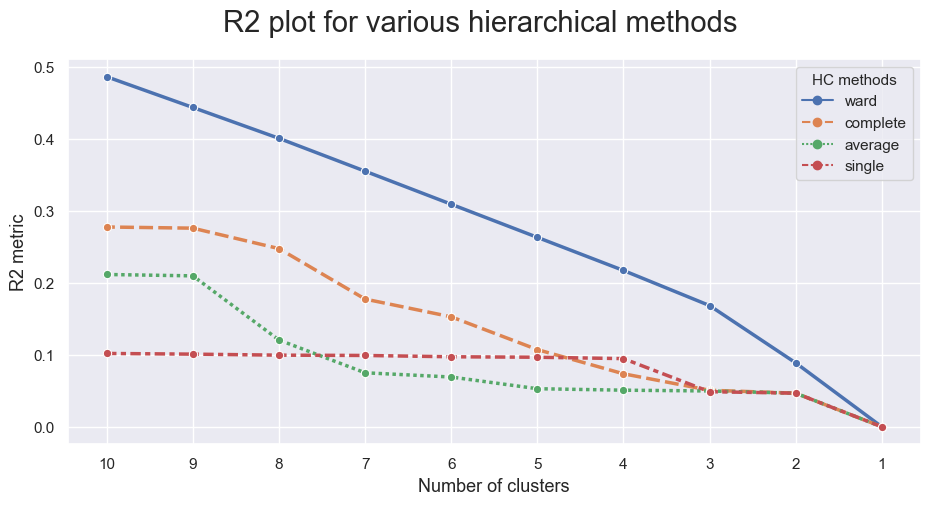

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

array([11379, 11271, 12773, ...,     1,     2,     0])

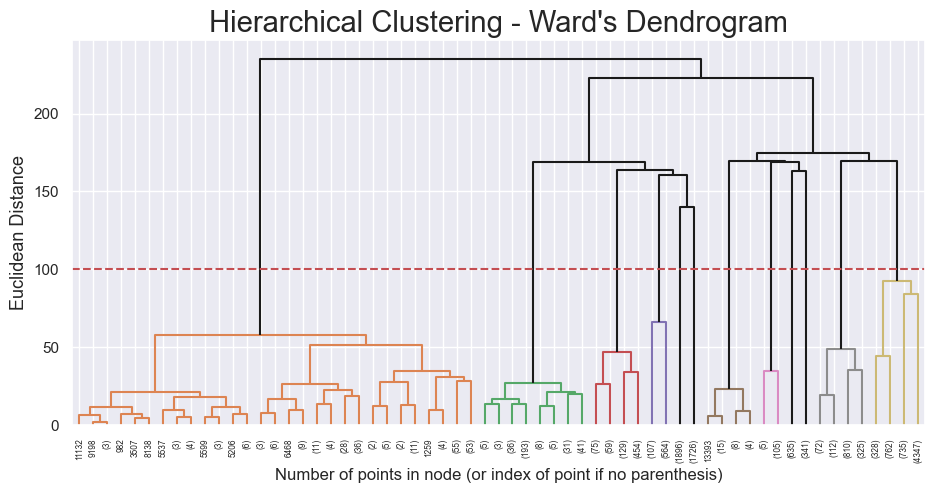

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

__Segmentation__

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import davies_bouldin_score 
from sklearn import metrics

/Users/helenamashayekhi/anaconda3/envs/helivenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/helenamashayekhi/anaconda3/envs/helivenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/helenamashayekhi/anaconda3/envs/helivenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/helenamashayekhi/anaconda3/envs/helivenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

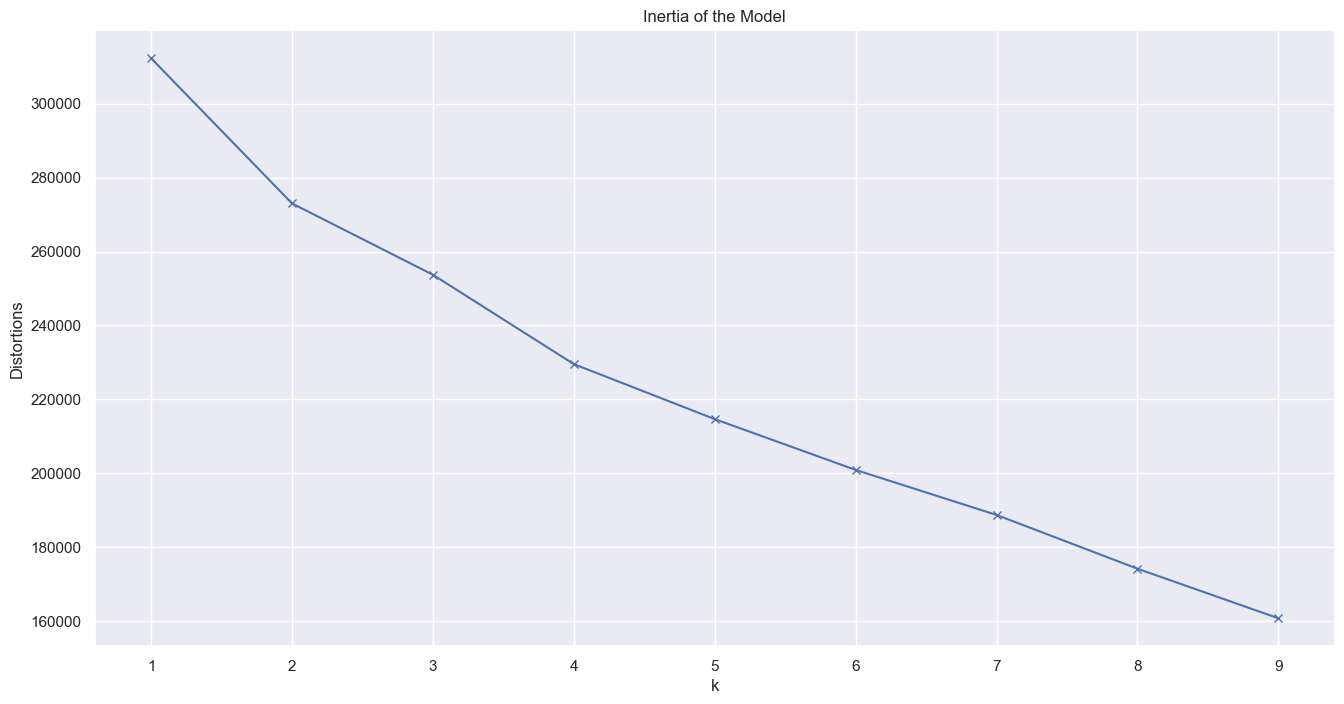

In [ ]:
distortions = []
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k).fit(df[metric_features])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Inertia of the Model')
plt.show()